## Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.utils import custom_object_scope
print("Libraries imported successfully!")

Libraries imported successfully!


### Loading Model

In [2]:
model = tf.keras.models.load_model('/content/trained_model.h5', safe_mode=False)
print("model loaded successfully!")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


model loaded successfully!


In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,764 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### Visualizaing Single Image of Test set

In [28]:
!pip install opencv-python

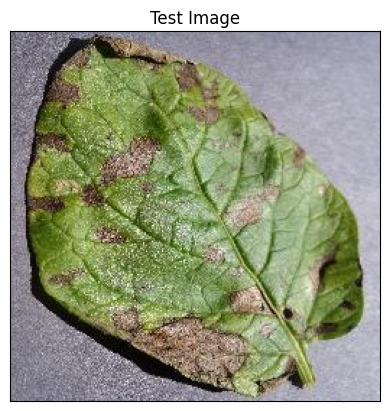

In [4]:
import cv2
image_path = "/content/PotatoEarlyBlight1.JPG"
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convert BGR image to RGB

#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [5]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [6]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


(array([[7.16429073e-14, 4.50178530e-16, 3.19811153e-13, 8.99479970e-17,
         1.00469542e-15, 2.72043571e-14, 2.32417155e-17, 8.11417067e-09,
         4.78222462e-10, 1.53813933e-13, 1.37189903e-16, 1.34546183e-12,
         1.98898675e-16, 9.92696680e-09, 5.75784675e-17, 4.06348464e-18,
         2.80060503e-10, 2.74847659e-16, 6.44861822e-13, 2.20016246e-17,
         1.00000000e+00, 2.64464735e-08, 1.01205834e-14, 1.30820162e-16,
         2.38955584e-18, 4.90497996e-13, 2.34797550e-08, 1.20451109e-14,
         2.01835415e-14, 1.21087940e-08, 7.50614035e-13, 2.44540397e-16,
         1.92409244e-09, 3.98802847e-15, 3.75417231e-16, 3.37828800e-15,
         8.16110845e-16, 3.80402454e-15]], dtype=float32),
 (1, 38))

In [7]:
result_index = np.argmax(prediction)
result_index

20

In [8]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

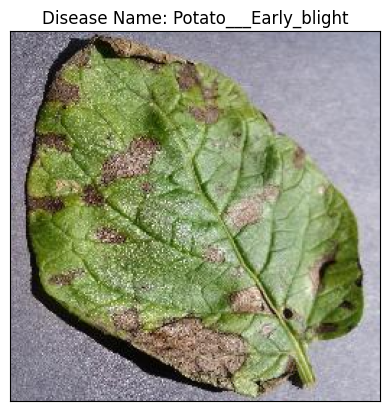

In [9]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

**Model prediction and confidence scores**

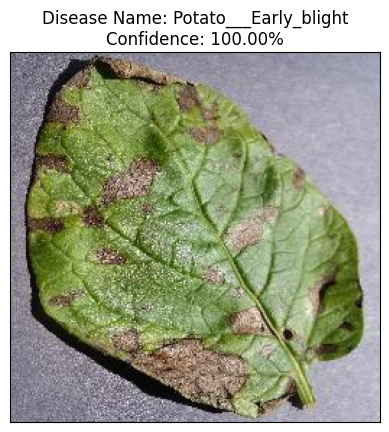

The plant leaf predicted by GunduziAI is: Potato___Early_blight
Prediction Confidence Score: 100.00%


In [18]:
# Getting the confidence score of the prediction
confidence_score = prediction[0][result_index] * 100  # Convert to percentage

# Displaying Result of disease prediction
model_prediction = class_name[result_index]

plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}\nConfidence: {confidence_score:.2f}%")
plt.xticks([])
plt.yticks([])
plt.show()

print(f"The plant leaf predicted by GunduziAI is: {model_prediction}")
print(f"Prediction Confidence Score: {confidence_score:.2f}%")


**END OF PREDICTION**

In [20]:
# Dictionary containing disease details and treatments
plant_disease_info = {
    # Apple___Apple_scab disease
    'Potato___Early_blight': {
        'Symptoms': [
            'Olive-green or black velvety spots on leaves',
            'Yellowing and premature leaf drop',
            'Scabby, cracked fruit surface',
            'Lesions on young twigs',
            'Reduced fruit yield'
        ],
        'Similar Diseases': ['Cedar Apple Rust', 'Sooty Blotch'],
        'Preventive Measures': [
            'Use resistant apple varieties (e.g., Enterprise, Liberty)',
            'Maintain proper pruning for airflow',
            'Remove infected leaves and fallen fruit',
            'Avoid overhead watering',
            'Rotate crops annually'
        ],
        'Chemical Treatments': [
            'Apply fungicides containing Captan or Mancozeb',
            'Use protective sprays like Myclobutanil'
        ],
        'Organic Solutions': [
            'Spray neem oil as a natural antifungal',
            'Apply compost tea for boosting plant immunity',
            'Use a sulfur-based organic fungicide'
        ],
        'Best Farming Practices': [
            'Regularly inspect orchards for early symptoms',
            'Use mulching to prevent spores from splashing onto leaves',
            'Avoid excessive nitrogen fertilization'
        ]
    },

   # Apple___Black_rot Disease
    'Apple___Black_rot': {
        'Symptoms': [
            'Circular brown lesions on leaves',
            'Sunken black spots on fruit',
            'Fruit shriveling and mummification',
            'Bark cankers on branches',
            'Wilting of shoots'
        ],
        'Similar Diseases': ['Bitter Rot', 'Frogeye Leaf Spot'],
        'Preventive Measures': [
            'Remove infected plant material promptly',
            'Practice orchard sanitation',
            'Prune trees to improve ventilation',
            'Avoid planting in areas with poor drainage',
            'Use resistant cultivars when possible'
        ],
        'Chemical Treatments': [
            'Apply copper-based fungicides',
            'Use Thiophanate-methyl for severe cases'
        ],
        'Organic Solutions': [
            'Spray Bordeaux mixture (copper sulfate + lime)',
            'Apply sulfur-based organic fungicides',
            'Use biological control with Trichoderma'
        ],
        'Best Farming Practices': [
            'Ensure proper spacing between trees',
            'Regularly rotate crops to break disease cycle',
            'Maintain balanced soil nutrition'
        ]
    },

    # Apple___Cedar_apple_rust disease
    'Apple___Cedar_apple_rust': {
        'Symptoms': [
            'Orange gelatinous spots on apple leaves',
            'Yellowing and premature defoliation',
            'Twig infections leading to branch dieback',
            'Gall formation on juniper trees (alternate host)',
            'Fruit deformation and blemishes'
        ],
        'Similar Diseases': ['Quince Rust', 'Hawthorn Rust'],
        'Preventive Measures': [
            'Remove nearby juniper trees to break the cycle',
            'Use resistant apple varieties',
            'Prune infected branches early',
            'Maintain proper orchard spacing',
            'Apply dormant oil in early spring'
        ],
        'Chemical Treatments': [
            'Spray fungicides containing Myclobutanil',
            'Use Mancozeb or Propiconazole for control'
        ],
        'Organic Solutions': [
            'Use neem oil to disrupt fungal growth',
            'Apply sulfur-based sprays during early infection',
            'Encourage beneficial microbes in the soil'
        ],
        'Best Farming Practices': [
            'Regular monitoring and early intervention',
            'Avoid planting susceptible apple and juniper trees together',
            'Improve soil health to boost plant immunity'
        ]
    },

    # Apple___healthy
    'Apple___healthy': {
        'Symptoms': ['No disease symptoms detected'],
        'Similar Diseases': ['None'],
        'Preventive Measures': [
            'Regularly monitor for signs of disease',
            'Practice proper pruning and sanitation',
            'Use balanced fertilization',
            'Encourage natural predators of pests',
            'Maintain proper watering schedules'
        ],
        'Chemical Treatments': ['Not required'],
        'Organic Solutions': ['Not required'],
        'Best Farming Practices': [
            'Crop rotation to prevent soil-borne pathogens',
            'Mulching to maintain soil moisture',
            'Use organic compost to improve soil health'
        ]
    },


    'Grape___Black_rot': {
        'Symptoms': [
            'Small, circular brown spots on leaves with black edges',
            'Dark sunken lesions on fruit that later shrivel into hard black mummies',
            'Infected stems develop dark streaks',
            'Premature leaf drop and reduced fruit yield',
            'Sticky spores visible on infected areas in humid conditions'
        ],
        'Similar Diseases': ['Grape Downy Mildew', 'Grape Powdery Mildew'],
        'Preventive Measures': [
            'Prune vines to improve air circulation',
            'Remove mummified fruit from vines and soil',
            'Plant resistant grape varieties',
            'Avoid overhead irrigation',
            'Apply dormant oil sprays in winter'
        ],
        'Chemical Treatments': ['Mancozeb', 'Myclobutanil', 'Copper-based fungicides'],
        'Organic Solutions': ['Sulfur spray', 'Baking soda solution', 'Neem oil'],
        'Best Farming Practices': [
            'Maintain proper vine spacing',
            'Use well-drained soil with proper nutrient balance',
            'Monitor and remove infected plant material',
            'Encourage natural predators of fungal spores'
        ]
    },

    'Grape___Esca_(Black_Measles)': {
        'Symptoms': [
            'Dark streaks appear on woody stems',
            'Irregular brown spots on leaves with yellow halos',
            'Grapes show sunken brown lesions and dry out',
            'Sudden vine collapse in severe cases',
            'Black fungal spores present on pruning wounds'
        ],
        'Similar Diseases': ['Botryosphaeria Canker', 'Eutypa Dieback'],
        'Preventive Measures': [
            'Prune properly to prevent wounds',
            'Remove and destroy infected vines',
            'Avoid mechanical injuries during vineyard management',
            'Promote healthy soil with organic matter',
            'Use resistant grape cultivars'
        ],
        'Chemical Treatments': ['Triazole-based fungicides', 'Copper sulfate sprays'],
        'Organic Solutions': ['Trichoderma-based biofungicides', 'Garlic extract sprays'],
        'Best Farming Practices': [
            'Ensure proper soil drainage',
            'Reduce plant stress with adequate watering',
            'Rotate fungicides to prevent resistance',
            'Monitor for early signs of infection'
        ]
    },

    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': {
        'Symptoms': [
            'Irregular dark brown leaf spots with yellow halos',
            'Severe infection leads to leaf curling and premature drop',
            'Leaves develop a brittle texture',
            'Spots merge, forming large necrotic areas',
            'Reduced fruit quality due to leaf loss'
        ],
        'Similar Diseases': ['Downy Mildew', 'Anthracnose'],
        'Preventive Measures': [
            'Improve air circulation by proper pruning',
            'Apply mulch to prevent soil splash',
            'Practice vineyard sanitation by removing infected leaves',
            'Monitor weather conditions and apply timely treatments',
            'Avoid excessive nitrogen fertilization'
        ],
        'Chemical Treatments': ['Difenoconazole', 'Chlorothalonil'],
        'Organic Solutions': ['Neem oil', 'Baking soda spray'],
        'Best Farming Practices': [
            'Use disease-resistant grape varieties',
            'Plant vines in well-drained soil',
            'Rotate fungicides to prevent pathogen resistance'
        ]
    },

    'Grape___healthy': {
        'Preventive Measures': [
            'Maintain proper vineyard hygiene',
            'Ensure balanced fertilization',
            'Use proper irrigation techniques',
            'Monitor for early disease symptoms',
            'Prune regularly for good airflow'
        ]
    },

    'Orange___Haunglongbing_(Citrus_greening)': {
        'Symptoms': [
            'Yellowing leaves with asymmetrical blotches',
            'Small, lopsided, bitter-tasting fruits',
            'Premature fruit drop',
            'Twig dieback and tree decline',
            'Slow tree growth with sparse canopy'
        ],
        'Similar Diseases': ['Citrus Tristeza Virus', 'Citrus Canker'],
        'Preventive Measures': [
            'Use disease-free planting material',
            'Control psyllid insect vectors',
            'Regularly prune infected branches',
            'Avoid movement of infected plant material',
            'Apply foliar zinc and iron supplements'
        ],
        'Chemical Treatments': ['Imidacloprid for psyllid control'],
        'Organic Solutions': ['Neem oil sprays', 'Essential oil-based insecticides'],
        'Best Farming Practices': [
            'Use certified disease-free saplings',
            'Implement integrated pest management',
            'Plant windbreaks to reduce psyllid spread'
        ]
    },

    'Peach___Bacterial_spot': {
        'Symptoms': [
            'Small, water-soaked lesions on leaves and fruit',
            'Lesions turn dark brown with irregular edges',
            'Premature leaf drop leads to defoliation',
            'Fruits develop black, sunken pits',
            'Weak growth due to leaf loss'
        ],
        'Similar Diseases': ['Peach Scab', 'Coryneum Blight'],
        'Preventive Measures': [
            'Use resistant peach varieties',
            'Avoid excessive nitrogen fertilization',
            'Apply copper-based sprays in early season',
            'Improve orchard ventilation',
            'Destroy infected plant material'
        ],
        'Chemical Treatments': ['Copper hydroxide', 'Oxytetracycline'],
        'Organic Solutions': ['Baking soda spray', 'Compost tea'],
        'Best Farming Practices': [
            'Plant in well-drained soil',
            'Practice proper pruning techniques',
            'Monitor weather conditions for early signs'
        ]
    },

    'Peach___healthy': {
        'Preventive Measures': [
            'Maintain balanced fertilization',
            'Ensure proper irrigation',
            'Prune to remove weak growth',
            'Inspect regularly for pests and diseases'
        ]
    },

    'Pepper,_bell___Bacterial_spot': {
        'Symptoms': [
            'Small, dark, water-soaked spots on leaves',
            'Leaf spots grow and merge, causing defoliation',
            'Sunken, black lesions on fruit',
            'Fruit cracking and distortion',
            'Reduced yield and weak plants'
        ],
        'Similar Diseases': ['Anthracnose', 'Gray Mold'],
        'Preventive Measures': [
            'Use disease-free seeds and transplants',
            'Apply copper-based bactericides',
            'Rotate crops every 2–3 years',
            'Avoid overhead irrigation',
            'Remove and destroy infected plants'
        ],
        'Chemical Treatments': ['Copper fungicides', 'Streptomycin'],
        'Organic Solutions': ['Compost tea sprays', 'Baking soda solution'],
        'Best Farming Practices': [
            'Maintain optimal soil pH',
            'Monitor for early disease symptoms',
            'Space plants for good air circulation'
        ]
    },

    'Pepper,_bell___healthy': {
        'Preventive Measures': [
            'Keep soil nutrients balanced',
            'Irrigate at root level to prevent fungal infections',
            'Rotate crops regularly',
            'Prune for better airflow'
        ]
    },

   'Potato___Early_blight': {
        'Symptoms': [
            'Small, dark brown spots with concentric rings on older leaves',
            'Yellowing of surrounding leaf tissue, forming a "target-like" pattern',
            'Lesions expand, causing premature defoliation',
            'Dark sunken spots on tubers with dry, leathery texture',
            'Weakened plants leading to reduced tuber production'
        ],
        'Similar Diseases': ['Late Blight', 'Bacterial Wilt'],
        'Preventive Measures': [
            'Plant resistant potato varieties (e.g., Defender, Kennebec)',
            'Ensure proper crop rotation (avoid planting potatoes or tomatoes in the same area for consecutive seasons)',
            'Remove and destroy infected plant debris after harvest',
            'Space plants properly to allow good air circulation',
            'Avoid overhead irrigation to keep foliage dry'
        ],
        'Chemical Treatments': [
            'Apply Chlorothalonil-based fungicides at early stages',
            'Use Mancozeb or Difenoconazole for effective disease control',
            'Apply fungicides in rotation to prevent resistance development'
        ],
        'Organic Solutions': [
            'Spray copper-based fungicides such as Bordeaux mixture',
            'Use neem oil as a natural antifungal treatment',
            'Apply compost tea or beneficial microbial sprays to enhance plant immunity'
        ],
        'Best Farming Practices': [
            'Use certified disease-free seed potatoes',
            'Harvest tubers during dry weather to prevent post-harvest infection',
            'Maintain balanced soil nutrients, especially potassium, to strengthen plant defenses',
            'Mulch around plants to reduce soil splash, which spreads fungal spores',
            'Monitor regularly and remove affected leaves early to slow disease spread'
        ]
    },

    'Potato___Late_blight': {
        'Symptoms': [
            'Large, dark water-soaked lesions on leaves',
            'White fungal growth under humid conditions',
            'Rapid leaf wilting and death',
            'Dark brown lesions on tubers',
            'Foul smell in infected potatoes'
        ],
        'Similar Diseases': ['Early Blight', 'Blackleg'],
        'Preventive Measures': [
            'Plant resistant varieties',
            'Avoid excessive irrigation',
            'Remove infected plant debris',
            'Use well-drained soil',
            'Apply copper-based fungicides'
        ],
        'Chemical Treatments': ['Metalaxyl', 'Chlorothalonil'],
        'Organic Solutions': ['Neem oil spray', 'Baking soda solution'],
        'Best Farming Practices': [
            'Use certified disease-free seeds',
            'Ensure good air circulation',
            'Monitor weather forecasts to time sprays effectively'
        ]
    },


    'Potato___healthy': {
        'Preventive Measures': [
            'Use crop rotation techniques',
            'Monitor soil moisture carefully',
            'Plant in well-drained soil'
        ]
    },

    'Blueberry___healthy': {
        'Symptoms': ['No disease symptoms detected'],
        'Similar Diseases': ['None'],
        'Preventive Measures': [
            'Regularly monitor for signs of disease',
            'Use disease-resistant varieties',
            'Maintain balanced soil pH (4.5–5.5)',
            'Provide proper irrigation and drainage',
            'Prune to improve air circulation'
        ],
        'Chemical Treatments': ['Not required'],
        'Organic Solutions': ['Not required'],
        'Best Farming Practices': [
            'Use mulch to maintain soil moisture',
            'Ensure proper spacing to prevent disease spread',
            'Encourage beneficial microbes in the soil'
        ]
    },

    'Cherry_(including_sour)___Powdery_mildew': {
        'Symptoms': [
            'White powdery fungal growth on leaves and twigs',
            'Curled and distorted leaves',
            'Premature leaf drop',
            'Stunted fruit development',
            'Reduced photosynthesis efficiency'
        ],
        'Similar Diseases': ['Rust', 'Leaf Spot'],
        'Preventive Measures': [
            'Plant resistant cherry varieties',
            'Prune trees to improve airflow',
            'Avoid excessive nitrogen fertilization',
            'Water at the base to prevent leaf wetness',
            'Ensure proper sunlight exposure'
        ],
        'Chemical Treatments': [
            'Use fungicides containing Sulfur or Myclobutanil',
            'Apply Trifloxystrobin-based sprays for severe infections'
        ],
        'Organic Solutions': [
            'Spray neem oil to reduce fungal growth',
            'Use potassium bicarbonate solution',
            'Apply compost tea to strengthen plant immunity'
        ],
        'Best Farming Practices': [
            'Regularly inspect for early symptoms',
            'Remove and dispose of infected leaves',
            'Rotate crops annually to prevent reinfection'
        ]
    },

    'Cherry_(including_sour)___healthy': {
        'Symptoms': ['No disease symptoms detected'],
        'Similar Diseases': ['None'],
        'Preventive Measures': [
            'Regularly prune for good airflow',
            'Use disease-resistant cherry cultivars',
            'Monitor for early signs of infections',
            'Avoid excessive irrigation',
            'Use proper fertilization techniques'
        ],
        'Chemical Treatments': ['Not required'],
        'Organic Solutions': ['Not required'],
        'Best Farming Practices': [
            'Mulch around the base to retain moisture',
            'Encourage pollinators for better yield',
            'Maintain proper orchard sanitation'
        ]
    },

    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': {
        'Symptoms': [
            'Narrow, rectangular grayish-brown lesions on leaves',
            'Yellow halo around spots',
            'Leaf necrosis and premature death',
            'Reduced grain filling',
            'High humidity accelerates disease progression'
        ],
        'Similar Diseases': ['Common Rust', 'Northern Leaf Blight'],
        'Preventive Measures': [
            'Plant resistant maize hybrids',
            'Rotate crops to break disease cycle',
            'Avoid excessive nitrogen application',
            'Improve field drainage',
            'Use no-till farming to reduce soil disturbance'
        ],
        'Chemical Treatments': [
            'Apply fungicides containing Azoxystrobin',
            'Use Pyraclostrobin-based treatments'
        ],
        'Organic Solutions': [
            'Spray compost tea for microbial protection',
            'Use garlic or copper sprays',
            'Encourage beneficial bacteria in soil'
        ],
        'Best Farming Practices': [
            'Monitor fields regularly for early signs',
            'Harvest early if infection is severe',
            'Maintain healthy soil with organic matter'
        ]
    },

    'Corn_(maize)___Common_rust_': {
        'Symptoms': [
            'Reddish-brown pustules on leaves',
            'Pustules release powdery rust spores',
            'Leaves may yellow and die prematurely',
            'Weakened plant leading to reduced yields',
            'Occurs more in cool, wet conditions'
        ],
        'Similar Diseases': ['Gray Leaf Spot', 'Southern Rust'],
        'Preventive Measures': [
            'Grow resistant corn varieties',
            'Improve field ventilation by proper spacing',
            'Control weeds that harbor rust spores',
            'Rotate crops with non-host plants',
            'Avoid excessive nitrogen fertilization'
        ],
        'Chemical Treatments': [
            'Spray fungicides containing Tebuconazole',
            'Use Propiconazole-based applications'
        ],
        'Organic Solutions': [
            'Spray neem oil to slow fungal spread',
            'Apply compost tea for plant immunity',
            'Encourage beneficial insects to deter disease vectors'
        ],
        'Best Farming Practices': [
            'Plant rust-resistant maize hybrids',
            'Remove and burn infected leaves',
            'Improve drainage to prevent prolonged leaf wetness'
        ]
    },

    'Corn_(maize)___Northern_Leaf_Blight': {
        'Symptoms': [
            'Long, cigar-shaped gray-green lesions on leaves',
            'Lesions turn tan and develop spores',
            'Premature leaf wilting and death',
            'Reduced ear development and yield loss',
            'More severe in warm, humid environments'
        ],
        'Similar Diseases': ['Gray Leaf Spot', 'Southern Corn Leaf Blight'],
        'Preventive Measures': [
            'Plant resistant hybrids suited for local conditions',
            'Rotate crops to prevent pathogen buildup',
            'Plow under crop debris after harvest',
            'Ensure balanced soil fertility for stronger plants',
            'Improve irrigation management to avoid prolonged wetness'
        ],
        'Chemical Treatments': [
            'Use Strobilurin-based fungicides like Azoxystrobin',
            'Apply Propiconazole sprays as preventive measures'
        ],
        'Organic Solutions': [
            'Use compost tea to strengthen plant defenses',
            'Apply sulfur-based organic fungicides',
            'Encourage beneficial fungi in the soil'
        ],
        'Best Farming Practices': [
            'Regular scouting to detect early symptoms',
            'Harvest promptly to minimize secondary infections',
            'Maintain healthy crop residues to improve soil health'
        ]
    },

    'Corn_(maize)___healthy': {
        'Symptoms': ['No disease symptoms detected'],
        'Similar Diseases': ['None'],
        'Preventive Measures': [
            'Plant high-quality, disease-resistant seeds',
            'Monitor fields for pest and disease outbreaks',
            'Practice proper crop rotation techniques',
            'Ensure adequate soil fertility',
            'Maintain proper irrigation schedules'
        ],
        'Chemical Treatments': ['Not required'],
        'Organic Solutions': ['Not required'],
        'Best Farming Practices': [
            'Use mulching to retain soil moisture',
            'Encourage beneficial insects for natural pest control',
            'Ensure proper field spacing to prevent disease spread'
        ]
    },

    #Tomato___Tomato_Yellow_Leaf_Curl_Virus disease
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': {
        'Symptoms': [
            'Upward curling of leaves',
            'Yellowing and stunted growth',
            'Reduced fruit production',
            'Whitefly infestations',
            'Brittle leaves with vein clearing'
        ],
        'Similar Diseases': ['Tomato Mosaic Virus', 'Cucumber Mosaic Virus'],
        'Preventive Measures': [
            'Use resistant tomato varieties (e.g., TYLCV-resistant cultivars)',
            'Control whiteflies using sticky traps',
            'Apply reflective mulches to deter vectors',
            'Rotate tomato crops annually',
            'Sanitize tools and equipment'
        ],
        'Chemical Treatments': [
            'Apply insecticides like Imidacloprid for whitefly control',
            'Use systemic neonicotinoids in extreme cases'
        ],
        'Organic Solutions': [
            'Spray neem oil to disrupt whitefly breeding',
            'Introduce ladybugs as natural whitefly predators',
            'Use garlic or chili spray to repel insects'
        ],
        'Best Farming Practices': [
            'Plant resistant varieties suited for local conditions',
            'Ensure proper spacing to reduce disease spread',
            'Encourage biodiversity to naturally control pests'
        ]
    },

    # Tomato___Late_blight disease
    'Tomato___Late_blight': {
        'Symptoms': [
            'Dark, water-soaked lesions on leaves',
            'White mold-like growth under leaves',
            'Rapid spread during humid conditions',
            'Brown sunken spots on fruits',
            'Defoliation and plant collapse'
        ],
        'Similar Diseases': ['Early Blight', 'Septoria Leaf Spot'],
        'Preventive Measures': [
            'Remove infected plant debris immediately',
            'Avoid overhead watering',
            'Provide adequate air circulation between plants',
            'Apply copper-based fungicides preventively',
            'Plant resistant tomato cultivars'
        ],
        'Chemical Treatments': [
            'Use Chlorothalonil-based fungicides',
            'Apply systemic fungicides like Metalaxyl'
        ],
        'Organic Solutions': [
            'Use Bordeaux mixture (copper sulfate + lime)',
            'Spray compost tea to boost plant immunity',
            'Apply hydrogen peroxide solution as a preventive measure'
        ],
        'Best Farming Practices': [
            'Regularly scout fields for early symptoms',
            'Implement crop rotation strategies',
            'Improve soil drainage to prevent prolonged moisture'
        ]
    }
}

# Example usage after model prediction
predicted_disease = model_prediction  # Can be Replaced with actual prediction

if predicted_disease in plant_disease_info:
    info = plant_disease_info[predicted_disease]
    print(f"Disease Name: {predicted_disease}")
    print("\nSymptoms:")
    for symptom in info['Symptoms']:
        print(f"- {symptom}")

    print("\nSimilar Diseases:", ", ".join(info['Similar Diseases']))
    print("\nPreventive Measures:")
    for measure in info['Preventive Measures']:
        print(f"- {measure}")

    print("\nChemical Treatments:", ", ".join(info['Chemical Treatments']))
    print("\nOrganic Solutions:", ", ".join(info['Organic Solutions']))
    print("\nBest Farming Practices:")
    for practice in info['Best Farming Practices']:
        print(f"- {practice}")

else:
    print("No treatment recommendations available for this disease.")


Disease Name: Potato___Early_blight

Symptoms:
- Small, dark brown spots with concentric rings on older leaves
- Yellowing of surrounding leaf tissue, forming a "target-like" pattern
- Lesions expand, causing premature defoliation
- Dark sunken spots on tubers with dry, leathery texture
- Weakened plants leading to reduced tuber production

Similar Diseases: Late Blight, Bacterial Wilt

Preventive Measures:
- Plant resistant potato varieties (e.g., Defender, Kennebec)
- Ensure proper crop rotation (avoid planting potatoes or tomatoes in the same area for consecutive seasons)
- Remove and destroy infected plant debris after harvest
- Space plants properly to allow good air circulation
- Avoid overhead irrigation to keep foliage dry

Chemical Treatments: Apply Chlorothalonil-based fungicides at early stages, Use Mancozeb or Difenoconazole for effective disease control, Apply fungicides in rotation to prevent resistance development

Organic Solutions: Spray copper-based fungicides such as

**THE END OF TESTING**